In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("Breast_cancer_data.csv",na_values = "NaN")

In [57]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [58]:
df.isnull().value_counts()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  diagnosis
False        False         False           False      False            False        569
dtype: int64

In [59]:
X = df.drop("diagnosis",1).values
y = df["diagnosis"].values.reshape(-1,1)

We normalize the data

In [60]:
X = (X-np.min(X))/(np.max(X)-np.min(X))

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [62]:
x_train = X_train.T
x_test = X_test.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (5, 483)
x test:  (5, 86)
y train:  (1, 483)
y test:  (1, 86)


In [63]:
cost_list = []
index_list = []
learning_rate = 0.5
w1 = np.random.randn(3,x_train.shape[0]) * 0.1
b1 = np.zeros((3,1))
w2 = np.random.randn(y_train.shape[0],3) * 0.1
b2 = np.zeros((y_train.shape[0],1))

In [64]:
for i in range(0,1000):
    #forward propagation
    Z1 = np.dot(w1,x_train) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(w2,A1) + b2
    A2 = 1/(1+np.exp(-Z2))
    #cost
    cost = -np.sum(np.multiply(np.log(A2),y_train))/y_train.shape[1]
    #back propagation
    dZ2 = A2-y_train
    dW2 = np.dot(dZ2,A1.T)/x_train.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/x_train.shape[1]
    dZ1 = np.dot(w2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 = np.dot(dZ1,x_train.T)/x_train.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/x_train.shape[1]
    #update parameters
    w1 = w1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    if i % 50 == 0:
        cost_list.append(cost)
        index_list.append(i)
        print ("Cost after %i: th iteration %f" %(i, cost))

Cost after 0: th iteration 0.435299
Cost after 50: th iteration 0.290980
Cost after 100: th iteration 0.271438
Cost after 150: th iteration 0.202290
Cost after 200: th iteration 0.154647
Cost after 250: th iteration 0.137389
Cost after 300: th iteration 0.130899
Cost after 350: th iteration 0.128157
Cost after 400: th iteration 0.126889
Cost after 450: th iteration 0.126260
Cost after 500: th iteration 0.125927
Cost after 550: th iteration 0.125741
Cost after 600: th iteration 0.125631
Cost after 650: th iteration 0.125562
Cost after 700: th iteration 0.125516
Cost after 750: th iteration 0.125484
Cost after 800: th iteration 0.125461
Cost after 850: th iteration 0.125444
Cost after 900: th iteration 0.125431
Cost after 950: th iteration 0.125420


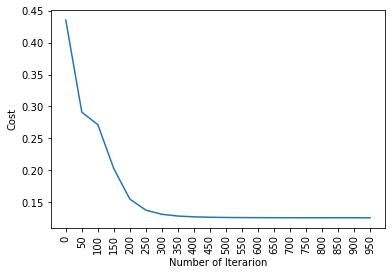

In [65]:
plt.plot(index_list,cost_list)
plt.xticks(index_list,rotation='vertical')
plt.xlabel("Number of Iterarion")
plt.ylabel("Cost")
plt.show()

We now evaluate to see the model performance

In [66]:
Z1 = np.dot(w1,x_test) + b1
A1 = np.tanh(Z1)
Z2 = np.dot(w2,A1) + b2
A2 = 1/(1+np.exp(-Z2))
Y_prediction = np.zeros((1,x_test.shape[1]))
for i in range(A2.shape[1]):
    if A2[0,i]<= 0.5:
        Y_prediction[0,i] = 0
    else:
        Y_prediction[0,i] = 1

print("Accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction - y_test)) * 100))

Accuracy: 93.02325581395348 %
